In [1]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape

torch.Size([11, 1])

In [3]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 9,  8,  4, 10,  6,  7,  5,  0,  1]), tensor([2, 3]))

In [6]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [7]:
import torch.nn as nn

linear_model = nn.Linear(1, 1)
linear_model(t_un_val)

tensor([[1.3834],
        [0.4351]], grad_fn=<AddmmBackward>)

In [8]:
linear_model.weight

Parameter containing:
tensor([[0.3902]], requires_grad=True)

In [9]:
linear_model.bias

Parameter containing:
tensor([-0.8878], requires_grad=True)

In [10]:
x = torch.ones(1)
linear_model(x)

tensor([-0.4976], grad_fn=<AddBackward0>)

In [11]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[-0.4976],
        [-0.4976],
        [-0.4976],
        [-0.4976],
        [-0.4976],
        [-0.4976],
        [-0.4976],
        [-0.4976],
        [-0.4976],
        [-0.4976]], grad_fn=<AddmmBackward>)

In [12]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(
    linear_model.parameters(),
    lr=1e-2)

In [14]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.1345]], requires_grad=True),
 Parameter containing:
 tensor([0.6495], requires_grad=True)]

In [16]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f"Validation loss {loss_val.item():.4f}")

In [18]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 4000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 95.7751,Validation loss 46.6680
Epoch 2, Training loss 41.5045,Validation loss 14.8058
Epoch 3, Training loss 34.2365,Validation loss 12.4585
Epoch 500, Training loss 8.2859,Validation loss 1.0814
Epoch 1000, Training loss 3.7673,Validation loss 1.8148
Epoch 1500, Training loss 2.9563,Validation loss 3.2067
Epoch 2000, Training loss 2.8107,Validation loss 3.9905
Epoch 2500, Training loss 2.7846,Validation loss 4.3574
Epoch 3000, Training loss 2.7799,Validation loss 4.5190
Epoch 3500, Training loss 2.7790,Validation loss 4.5887
Epoch 4000, Training loss 2.7789,Validation loss 4.6184

Parameter containing:
tensor([[5.5067]], requires_grad=True)
Parameter containing:
tensor([-18.3936], requires_grad=True)


In [19]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 4000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 325.1469,Validation loss 199.5692
Epoch 2, Training loss 73.0796,Validation loss 31.8960
Epoch 3, Training loss 39.6483,Validation loss 14.0867
Epoch 500, Training loss 8.5443,Validation loss 1.1270
Epoch 1000, Training loss 3.8137,Validation loss 1.7723
Epoch 1500, Training loss 2.9646,Validation loss 3.1776
Epoch 2000, Training loss 2.8122,Validation loss 3.9761
Epoch 2500, Training loss 2.7848,Validation loss 4.3509
Epoch 3000, Training loss 2.7799,Validation loss 4.5163
Epoch 3500, Training loss 2.7790,Validation loss 4.5875
Epoch 4000, Training loss 2.7789,Validation loss 4.6179

Parameter containing:
tensor([[5.5067]], requires_grad=True)
Parameter containing:
tensor([-18.3931], requires_grad=True)


In [20]:
seq_model = nn.Sequential(
            nn.Linear(1, 13),
            nn.Tanh(),
            nn.Linear(13, 1))
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [21]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [22]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [24]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [25]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [27]:
seq_model.output_linear.bias

Parameter containing:
tensor([0.2465], requires_grad=True)

In [29]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 195.5431,Validation loss 109.6915
Epoch 2, Training loss 190.7983,Validation loss 106.1735
Epoch 3, Training loss 186.4684,Validation loss 102.9340
Epoch 500, Training loss 16.5568,Validation loss 1.7350
Epoch 1000, Training loss 13.8430,Validation loss 5.7815
Epoch 1500, Training loss 5.1324,Validation loss 4.6634
Epoch 2000, Training loss 2.5275,Validation loss 5.0523
Epoch 2500, Training loss 1.6268,Validation loss 5.9872
Epoch 3000, Training loss 1.4124,Validation loss 6.5981
Epoch 3500, Training loss 1.3302,Validation loss 6.6123
Epoch 4000, Training loss 1.2850,Validation loss 6.6242
Epoch 4500, Training loss 1.2593,Validation loss 6.6392
Epoch 5000, Training loss 1.2443,Validation loss 6.6580
output tensor([[13.2492],
        [-0.2017]], grad_fn=<AddmmBackward>)
answer tensor([[15.],
        [ 3.]])
hidden tensor([[-0.0029],
        [-0.0053],
        [ 0.0045],
        [ 0.0070],
        [ 0.0016],
        [-0.0009],
        [-0.0001],
        [-0.0010]])

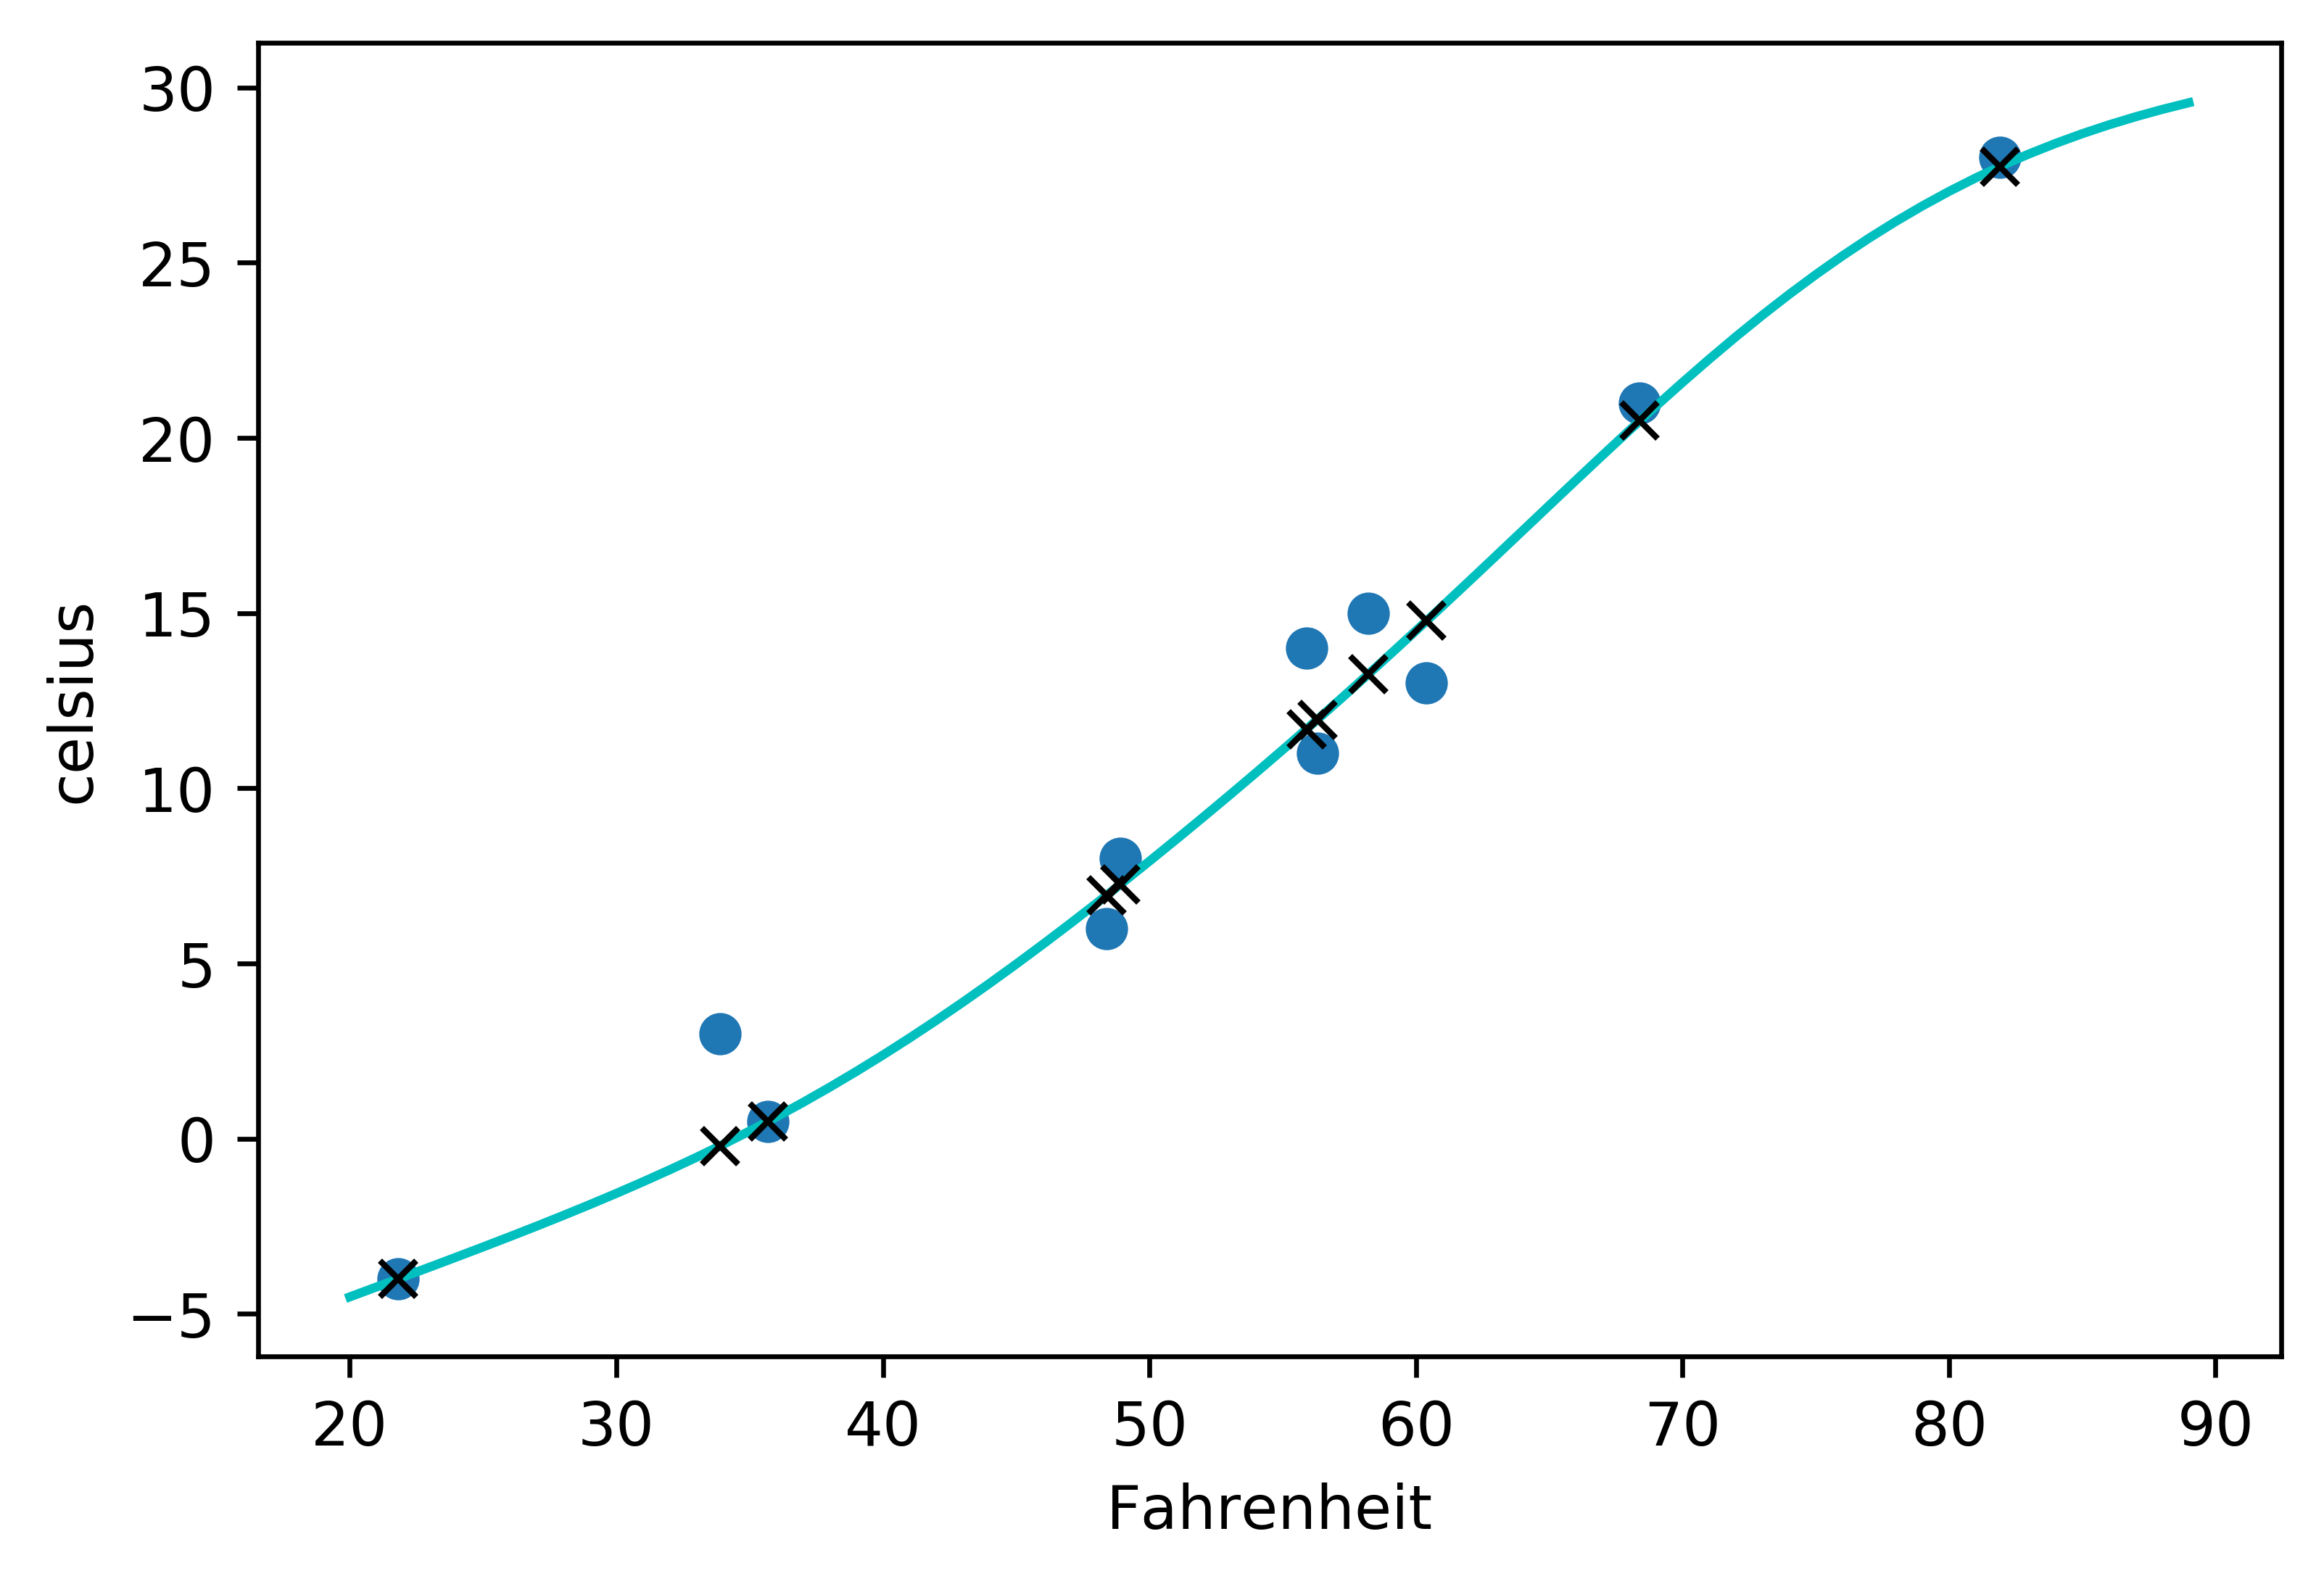

In [32]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

flg = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

In [33]:
neuron_count = 20

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, neuron_count),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(neuron_count, 1)))
]))

optimizer = optim.SGD(seq_model.parameters, lr=1e-4)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Farenheit")
plt.ylabel("celsius")
plt.plot(t_u.numpy(), t_c_numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

ValueError: too many values to unpack (expected 2)